---
MAT421 - Applied Computational Methods

Arizona State University

Homework #2

Written by Edward Hayes

---
This notebook is a review and an elaboration of the topics covered in Chapter 17 from *Python Programming and Numerical Methods - A Guide for Engineers and Scientists*.

---
# Chapter 17. Interpolation
---

## 17.1 Interpolation Problem Statement
Given a reliable data set, interpolation is the process of estimating an output for an input value that is not in the given data set.

In example, if given a reliable data set the output value for a input (referred to as the, "point of interest" in following code) can be estimated by using an interpolation function, $\hat{y}(x)$.

Below is a Python script that plots a data set with a verticle red line indicating possible interpolation values for a input.



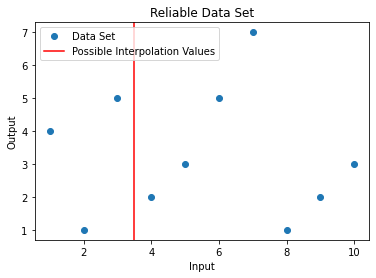

In [55]:
# import for plotting
import matplotlib.pyplot as plt
# import for array functions
import numpy as np

# reliable data set
x = [1,2,3,4,5,6,7,8,9,10]
y = [4,1,5,2,3,5,7,1,2,3]

# create a new vector of input values for interpolation methods
x_new = np.linspace(np.min(x),np.max(x),100)

# point of interest
point_interest = 3.5

# plot data set 
plt.plot(x,y,'o',label='Data Set')
# plot verticle red line indicating possible output values
plt.axvline(x=point_interest,color ='r',label='Possible Interpolation Values')

# title and label plot
plt.title('Reliable Data Set')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# show plot
plt.show()


## 17.2 Linear Interpolation

Linear interpolation uses a linear interpolation function between data points to estimate an output value for a given input $x$.
Let $x$ be a value between points $x_i<x<x_{i+1}$ then the interpolation function at $x$ is $\hat{y}(x)=y_i+\frac{(y_{i+1}-y_i)(x-x_i)}{(x_{i+1}-x_i)}$.

Below is a Python script that plots and performs linear interpolation for a given input.


Interpolation Value:  3.5


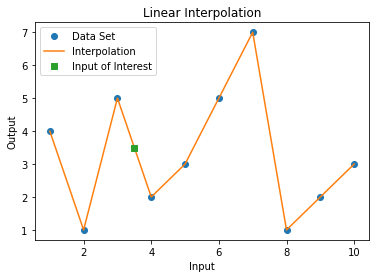

In [56]:
# import for linear interpolation
from scipy.interpolate import interp1d

# create linear interpolation function for data set
f = interp1d(x,y)
# create output values from linear interpolation function
y_new = f(x_new)
# create output value for input of interest
y_hat = f(point_interest)

# print the estimated value for given input
print('Interpolation Value: ',y_hat)

# plot data set
plt.plot(x,y,'o',label='Data Set')
# plot the linear interpolation
plt.plot(x_new,y_new,'-',label='Interpolation')
# plot estimated point
plt.plot(point_interest,y_hat,'s',label='Input of Interest')

# title, label plot and add legend
plt.title('Linear Interpolation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# show plot
plt.show()


## 17.3 Cubic Spline Interpolation

Cubic spline interpolation uses a set of piecewise cubic functions to estimate the output to a given input. Points in the data set are assumed to be joined by cubic polynomial functions of the form, $S_i(x)=a_ix^3+b_ix^2+c_ix+d_i$, where the function is valid for $x_i<x<x_{i+1}$. For a data set of $n$ points, $4(n-1)$ equations are needed to find all coefficients for the set of cubic functions. Equations are formed on the main basis that the functions join at data points, that the intersection is continuous and endpoints are 'straight lines' or their second derivative is zero. Calculating coefficients then requires linear algebra.

Below is a Python script that plots and performs cubic spline interpolation for a given input.

Interpolation Value: 3.878616352201258


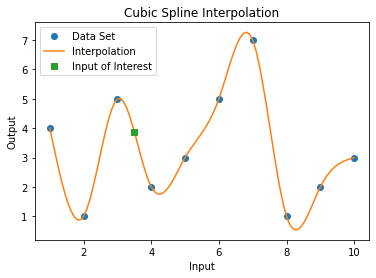

In [57]:
# import for cubic spline interpolation
from scipy.interpolate import CubicSpline

# create cubic splice interpolation function for data set
f = CubicSpline(x,y,bc_type='natural')

# create output values from cubic spline interpolation function
y_new = f(x_new)
# create output value for input of interest
y_hat = f(point_interest)

# print the estimated value for the given input
print('Interpolation Value:',y_hat)

# plot data set
plt.plot(x,y,'o',label='Data Set')
# plot the cubic spline interpolation
plt.plot(x_new,y_new,'-',label='Interpolation')
# plot estimated point
plt.plot(point_interest,y_hat,'s',label='Input of Interest')

# title, label plot and add legend
plt.title('Cubic Spline Interpolation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# show plot
plt.show()
